In [1]:
import argparse
import sys


parser = argparse.ArgumentParser(description='Settings for creating CBM')
# parser.add_argument('--batch_size', default=64, type=int)
# parser.add_argument('--epochs', default=30, type=int)
parser.add_argument('--update_freq', default=1, type=int)
parser.add_argument('--save_ckpt_freq', default=100, type=int)

# Model parameters
parser.add_argument('--model', default='vit_base_patch16_224', type=str, metavar='MODEL',
                    help='Name of model to train')
parser.add_argument('--tubelet_size', type=int, default= 2)
parser.add_argument('--input_size', default=224, type=int,
                    help='videos input size')

parser.add_argument('--fc_drop_rate', type=float, default=0.0, metavar='PCT',
                    help='Dropout rate (default: 0.)')
parser.add_argument('--drop', type=float, default=0.0, metavar='PCT',
                    help='Dropout rate (default: 0.)')
parser.add_argument('--attn_drop_rate', type=float, default=0.0, metavar='PCT',
                    help='Attention dropout rate (default: 0.)')
parser.add_argument('--drop_path', type=float, default=0.1, metavar='PCT',
                    help='Drop path rate (default: 0.1)')

parser.add_argument('--disable_eval_during_finetuning', action='store_true', default=False)
parser.add_argument('--model_ema', action='store_true', default=False)
parser.add_argument('--model_ema_decay', type=float, default=0.9999, help='')
parser.add_argument('--model_ema_force_cpu', action='store_true', default=False, help='')

# Optimizer parameters
parser.add_argument('--opt', default='adamw', type=str, metavar='OPTIMIZER',
                    help='Optimizer (default: "adamw"')
parser.add_argument('--opt_eps', default=1e-8, type=float, metavar='EPSILON',
                    help='Optimizer Epsilon (default: 1e-8)')
parser.add_argument('--opt_betas', default=None, type=float, nargs='+', metavar='BETA',
                    help='Optimizer Betas (default: None, use opt default)')
parser.add_argument('--clip_grad', type=float, default=None, metavar='NORM',
                    help='Clip gradient norm (default: None, no clipping)')
parser.add_argument('--momentum', type=float, default=0.9, metavar='M',
                    help='SGD momentum (default: 0.9)')
parser.add_argument('--weight_decay', type=float, default=0.05,
                    help='weight decay (default: 0.05)')
parser.add_argument('--weight_decay_end', type=float, default=None, help="""Final value of the
    weight decay. We use a cosine schedule for WD and using a larger decay by
    the end of training improves performance for ViTs.""")

parser.add_argument('--lr', type=float, default=1e-3, metavar='LR',
                    help='learning rate (default: 1e-3)')
parser.add_argument('--layer_decay', type=float, default=0.75)

parser.add_argument('--warmup_lr', type=float, default=1e-6, metavar='LR',
                    help='warmup learning rate (default: 1e-6)')
parser.add_argument('--min_lr', type=float, default=1e-6, metavar='LR',
                    help='lower lr bound for cyclic schedulers that hit 0 (1e-5)')

parser.add_argument('--warmup_epochs', type=int, default=5, metavar='N',
                    help='epochs to warmup LR, if scheduler supports')
parser.add_argument('--warmup_steps', type=int, default=-1, metavar='N',
                    help='num of steps to warmup LR, will overload warmup_epochs if set > 0')

# Augmentation parameters
parser.add_argument('--color_jitter', type=float, default=0.4, metavar='PCT',
                    help='Color jitter factor (default: 0.4)')
parser.add_argument('--num_sample', type=int, default=1,
                    help='Repeated_aug (default: 2)')
parser.add_argument('--aa', type=str, default='rand-m7-n4-mstd0.5-inc1', metavar='NAME',
                    help='Use AutoAugment policy. "v0" or "original". " + "(default: rand-m7-n4-mstd0.5-inc1)'),
parser.add_argument('--smoothing', type=float, default=0.1,
                    help='Label smoothing (default: 0.1)')
parser.add_argument('--train_interpolation', type=str, default='bicubic',
                    help='Training interpolation (random, bilinear, bicubic default: "bicubic")')

# Evaluation parameters
parser.add_argument('--crop_pct', type=float, default=None)
parser.add_argument('--short_side_size', type=int, default=224)
parser.add_argument('--test_num_segment', type=int, default=5)
parser.add_argument('--test_num_crop', type=int, default=3)

# Random Erase params
parser.add_argument('--reprob', type=float, default=0.25, metavar='PCT',
                    help='Random erase prob (default: 0.25)')
parser.add_argument('--remode', type=str, default='pixel',
                    help='Random erase mode (default: "pixel")')
parser.add_argument('--recount', type=int, default=1,
                    help='Random erase count (default: 1)')
parser.add_argument('--resplit', action='store_true', default=False,
                    help='Do not random erase first (clean) augmentation split')

# Mixup params
parser.add_argument('--mixup', type=float, default=0.0,
                    help='mixup alpha, mixup enabled if > 0.')
parser.add_argument('--cutmix', type=float, default=0.0,
                    help='cutmix alpha, cutmix enabled if > 0.')
parser.add_argument('--cutmix_minmax', type=float, nargs='+', default=None,
                    help='cutmix min/max ratio, overrides alpha and enables cutmix if set (default: None)')
parser.add_argument('--mixup_prob', type=float, default=0.0,
                    help='Probability of performing mixup or cutmix when either/both is enabled')
parser.add_argument('--mixup_switch_prob', type=float, default=0.0,
                    help='Probability of switching to cutmix when both mixup and cutmix enabled')
parser.add_argument('--mixup_mode', type=str, default='batch',
                    help='How to apply mixup/cutmix params. Per "batch", "pair", or "elem"')

# Finetuning params
parser.add_argument('--finetune', default='', help='finetune from checkpoint')
parser.add_argument('--model_key', default='model|module', type=str)
parser.add_argument('--model_prefix', default='', type=str)
parser.add_argument('--init_scale', default=0.001, type=float)
parser.add_argument('--use_checkpoint', action='store_true')
parser.set_defaults(use_checkpoint=False)
parser.add_argument('--use_mean_pooling', action='store_true')
parser.set_defaults(use_mean_pooling=True)
parser.add_argument('--use_cls', action='store_false', dest='use_mean_pooling')

# Dataset parameters

parser.add_argument('--eval_data_path', default=None, type=str,
                    help='dataset path for evaluation')
parser.add_argument('--nb_classes', default=400, type=int,
                    help='number of the classification types')
parser.add_argument('--imagenet_default_mean_and_std', default=True, action='store_true')
parser.add_argument('--num_segments', type=int, default= 1)
parser.add_argument('--num_frames', type=int, default= 16)
parser.add_argument('--sampling_rate', type=int, default= 4)
parser.add_argument('--data_set', default='Kinetics-400', choices=['Kinetics-400', 'SSV2', 'UCF101', 'HMDB51','image_folder'],
                    type=str, help='dataset')
parser.add_argument('--output_dir', default='',
                    help='path where to save, empty for no saving')
parser.add_argument('--log_dir', default=None,
                    help='path where to tensorboard log')
# parser.add_argument('--device', default='cuda',
#                     help='device to use for training / testing')
parser.add_argument('--seed', default=0, type=int)
parser.add_argument('--resume', default='',
                    help='resume from checkpoint')
parser.add_argument('--auto_resume', action='store_true')
parser.add_argument('--no_auto_resume', action='store_false', dest='auto_resume')
parser.set_defaults(auto_resume=True)

parser.add_argument('--save_ckpt', action='store_true')
parser.add_argument('--no_save_ckpt', action='store_false', dest='save_ckpt')
parser.set_defaults(save_ckpt=True)

parser.add_argument('--start_epoch', default=0, type=int, metavar='N',
                    help='start epoch')
parser.add_argument('--eval', action='store_true',
                    help='Perform evaluation only')
parser.add_argument('--dist_eval', action='store_true', default=False,
                    help='Enabling distributed evaluation')
parser.add_argument('--num_workers', default=10, type=int)
parser.add_argument('--pin_mem', action='store_true',
                    help='Pin CPU memory in DataLoader for more efficient (sometimes) transfer to GPU.')
parser.add_argument('--no_pin_mem', action='store_false', dest='pin_mem')
parser.set_defaults(pin_mem=True)

# distributed training parameters
parser.add_argument('--world_size', default=1, type=int,
                    help='number of distributed processes')
parser.add_argument('--local_rank', default=-1, type=int)
parser.add_argument('--dist_on_itp', action='store_true')
parser.add_argument('--dist_url', default='env://',
                    help='url used to set up distributed training')

parser.add_argument('--enable_deepspeed', action='store_true', default=False)
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
parser.add_argument("--dataset", type=str, default="cifar10")
parser.add_argument("--concept_set", type=str, default=None, 
                    help="path to concept set name")
parser.add_argument("--backbone", type=str, default="clip_RN50", help="Which pretrained model to use as backbone")
parser.add_argument("--clip_name", type=str, default="ViT-B/16", help="Which CLIP model to use")

parser.add_argument("--device", type=str, default="cuda", help="Which device to use")
parser.add_argument("--batch_size", type=int, default=512, help="Batch size used when saving model/CLIP activations")
parser.add_argument("--saga_batch_size", type=int, default=256, help="Batch size used when fitting final layer")
parser.add_argument("--proj_batch_size", type=int, default=50000, help="Batch size to use when learning projection layer")

parser.add_argument("--feature_layer", type=str, default='layer4', 
                    help="Which layer to collect activations from. Should be the name of second to last layer in the model")
parser.add_argument("--activation_dir", type=str, default='saved_activations', help="save location for backbone and CLIP activations")
parser.add_argument("--save_dir", type=str, default='saved_models', help="where to save trained models")
parser.add_argument("--clip_cutoff", type=float, default=0.25, help="concepts with smaller top5 clip activation will be deleted")
parser.add_argument("--proj_steps", type=int, default=1000, help="how many steps to train the projection layer for")
parser.add_argument("--interpretability_cutoff", type=float, default=0.45, help="concepts with smaller similarity to target concept will be deleted")
parser.add_argument("--lam", type=float, default=0.0007, help="Sparsity regularization parameter, higher->more sparse")
parser.add_argument("--n_iters", type=int, default=1000, help="How many iterations to run the final layer solver for")
parser.add_argument("--print", action='store_true', help="Print all concepts being deleted in this stage")
parser.add_argument('--data_path', default='data/video_annotation/ucf101', type=str,
                    help='dataset path')
parser.add_argument('--video-anno-path',type=str)
parser.add_argument('--center_frame',action='store_true')
parser.add_argument('--no_aug',type=bool,default=False)
parser.add_argument('--dual_encoder', default='clip', choices=['clip', 'lavila', 'internvid'],
                    type=str, help='dataset')
parser.add_argument('--dual_encoder_frames',type=int,default=16)
parser.add_argument('--lavila_ckpt',type=str,default=None)





_StoreAction(option_strings=['--lavila_ckpt'], dest='lavila_ckpt', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help=None, metavar=None)

In [2]:
sys.argv = ['notebook_name',
            '--data_set', 'UCF101',
            '--nb_classes', '101',
            '--video-anno-path', 'data/video_annotation/ucf101',
            '--data_path', '/local_datasets/ucf101/videos',
            "--concept_set","/data/jong980812/project/Video-CBM/data/concept_sets/in1k_filtered.txt",
            '--lavila_ckpt','/data/datasets/video_checkpoint/lavila_TSF_B.pth',
            "--finetune","/data/datasets/video_checkpoint/ucf101/ucf_finetune.pth",
            "--backbone","vmae_vit_base_patch16_224"
            ]
argument = parser.parse_args()

In [3]:
import torch
import os
import random
import cbm_utils
import data_utils
import json

import cbm
import plots

/data/jong980812/anaconda3/envs/video-cbm/lib/python3.8/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/data/jong980812/anaconda3/envs/video-cbm/lib/python3.8/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


In [4]:
argument.nb_classes

101

In [5]:
import argparse


In [6]:
# change this to the  correct model dir, everything else should be taken care of
load_dir = "/data/jong980812/project/Video-CBM/results/ucf101_lavila_vmae_ucf_finetune/ucf_sub/model/UCF101_cbm_2024_07_28_21_14"
device = "cuda"

with open(os.path.join(load_dir, "args.txt"), "r") as f:
    args = json.load(f)
dataset = args["data_set"]
_, target_preprocess = data_utils.get_target_model(args["backbone"], device,argument)
print('done')
model = cbm.load_cbm(load_dir, device,argument)

Patch size = (16, 16)
Load ckpt from /data/datasets/video_checkpoint/ucf101/ucf_finetune.pth
Load state_dict by model_key = module



*********** VMAE Load ***************
done
Patch size = (16, 16)
Load ckpt from /data/datasets/video_checkpoint/ucf101/ucf_finetune.pth
Load state_dict by model_key = module



*********** VMAE Load ***************


In [7]:
target_preprocess

In [8]:
val_d_probe = dataset+"_val"
cls_file = data_utils.LABEL_FILES[dataset]

val_data_t = data_utils.get_data(val_d_probe,args=argument)
argument.no_aug = True
argument.center_frame = True
val_pil_data = data_utils.get_data(val_d_probe,args=argument)

Number of the class = 101
Number of the class = 101


In [9]:
with open(cls_file, "r") as f:
    classes = f.read().split("\n")

with open(os.path.join(load_dir, "concepts.txt"), "r") as f:
    concepts = f.read().split("\n")

In [10]:
len(val_data_t)

2726

## Measure accuracy

In [11]:
accuracy = cbm_utils.get_accuracy_cbm(model, val_data_t, device,32,8)
print("Accuracy: {:.2f}%".format(accuracy*100))

  0%|          | 0/86 [00:02<?, ?it/s]


KeyboardInterrupt: 

## Show final layer weights for some classes

You can build a Sankey diagram of weights by copying the incoming weights printed below into https://sankeymatic.com/build/

In [12]:
to_show = random.choices([i for i in range(len(classes))], k=1)

for i in to_show:
    print("Output class:{} - {}".format(i, classes[i]))
    print("Incoming weights:")
    for j in range(len(concepts)):
        if torch.abs(model.final.weight[i,j])>0.05:
            print("{} [{:.4f}] {}".format(concepts[j], model.final.weight[i,j], classes[i]))

Output class:90 - TaiChi
Incoming weights:
people throw ball [-0.3133] TaiChi
people dribble [0.2722] TaiChi
people lie on bench [-0.2476] TaiChi
people line up shots [0.2417] TaiChi
people blow air [0.2303] TaiChi
people bend knees [-0.2448] TaiChi
people approach lane [-0.1317] TaiChi
people stand in stance [0.0937] TaiChi
people kick legs [0.3351] TaiChi
people stand on edge [0.7567] TaiChi
people swing stick [-0.2000] TaiChi
people mount horse [-0.4923] TaiChi
people ride at various paces [-0.6732] TaiChi
people march [0.1205] TaiChi
people hold drum [-0.1441] TaiChi
people strum strings [-0.2116] TaiChi
people remove hair [-0.2293] TaiChi
people kick ball [-0.2930] TaiChi
people push opponent [0.6521] TaiChi
people ride waves [1.1038] TaiChi
people grip racket [-0.5775] TaiChi
people walk alongside [0.1507] TaiChi
people throw yo-yo [0.2169] TaiChi


In [13]:
to_show = random.choices([i for i in range(len(classes))], k=2)

top_weights, top_weight_ids = torch.topk(model.final.weight, k=5, dim=1)
bottom_weights, bottom_weight_ids = torch.topk(model.final.weight, k=5, dim=1, largest=False)

for i in to_show:
    print("Class {} - {}".format(i, classes[i]))
    out = "Highest weights: "
    for j in range(top_weights.shape[1]):
        idx = int(top_weight_ids[i, j].cpu())
        out += "{}:{:.3f}, ".format(concepts[idx], top_weights[i, j])
    print(out)
    out = "Lowest weights: "
    for j in range(bottom_weights.shape[1]):
        idx = int(bottom_weight_ids[i, j].cpu())
        out += "{}:{:.3f}, ".format(concepts[idx], bottom_weights[i, j])
    print(out + "\n")

Class 17 - BoxingSpeedBag
Highest weights: people grip racket:0.816, people blow air:0.746, people jump off cliff:0.707, people section hair:0.356, people navigate water:0.349, 
Lowest weights: people shoot:-0.679, people land on feet:-0.669, people march:-0.517, people strike drumheads:-0.367, people land in sand:-0.364, 

Class 34 - Hammering
Highest weights: people kick ball:0.753, people jump from plane:0.706, people throw javelin:0.653, people create stitches:0.611, people glide on snow:0.354, 
Lowest weights: people hold needles:-0.758, people ride waves:-0.716, people line up shots:-0.525, people blow air:-0.460, people run towards hoop:-0.347, 



In [14]:
# Some features may not have any non-zero outgoing weights, 
# i.e. these are not used by the model and should be deleted for better performance
weight_contribs = torch.sum(torch.abs(model.final.weight), dim=0)
print("Num concepts with outgoing weights:{}/{}".format(torch.sum(weight_contribs>1e-5), len(weight_contribs)))

Num concepts with outgoing weights:77/77


In [15]:
import subprocess
def avi_to_mp4(video_path):
    mp4_path = video_path[:-3]+'mp4'
    if os.path.exists(mp4_path):
        print(f"The file '{mp4_path}' exists.")
        return
    else:
        print(f"The file '{mp4_path}' does not exist.")
    input_file = video_path
    output_file = mp4_path
    command = ['ffmpeg', '-i', input_file, '-q:v', '2', output_file]

    # FFmpeg 명령어 실행
    subprocess.run(command, check=True)

    print("Video conversion completed successfully.")
    return mp4_path

## Explain model reasoning for random inputs

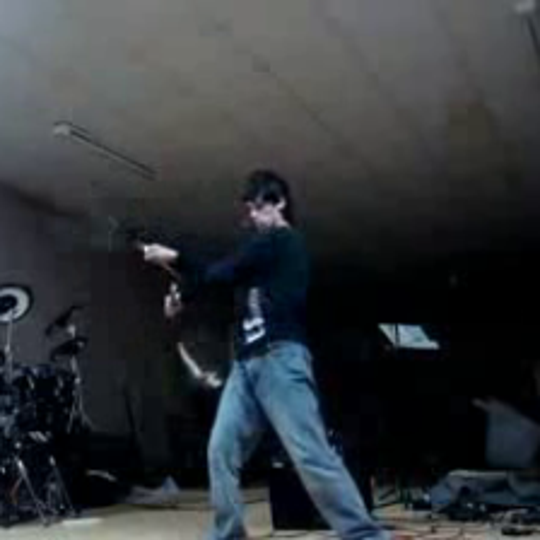

Image:1573 Gt:Nunchucks, 1st Pred:Nunchucks, 7.975, 2nd Pred:PizzaTossing, 3.185


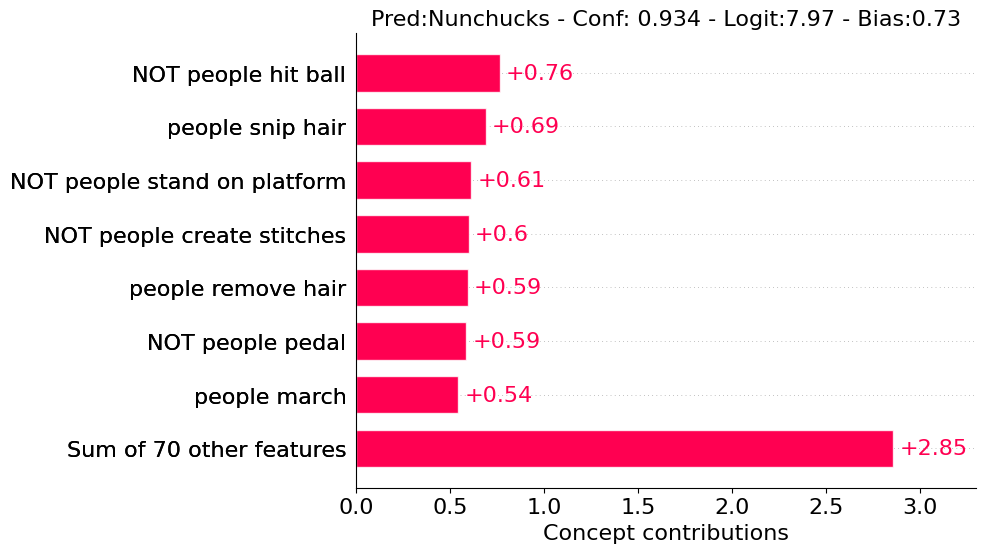

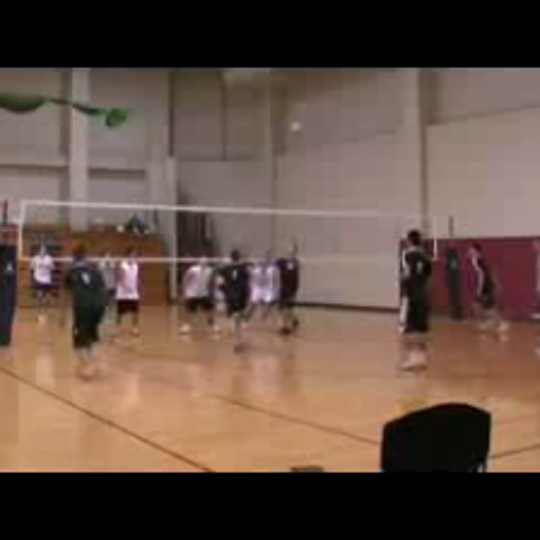

Image:211 Gt:VolleyballSpiking, 1st Pred:VolleyballSpiking, 8.472, 2nd Pred:SumoWrestling, 3.644


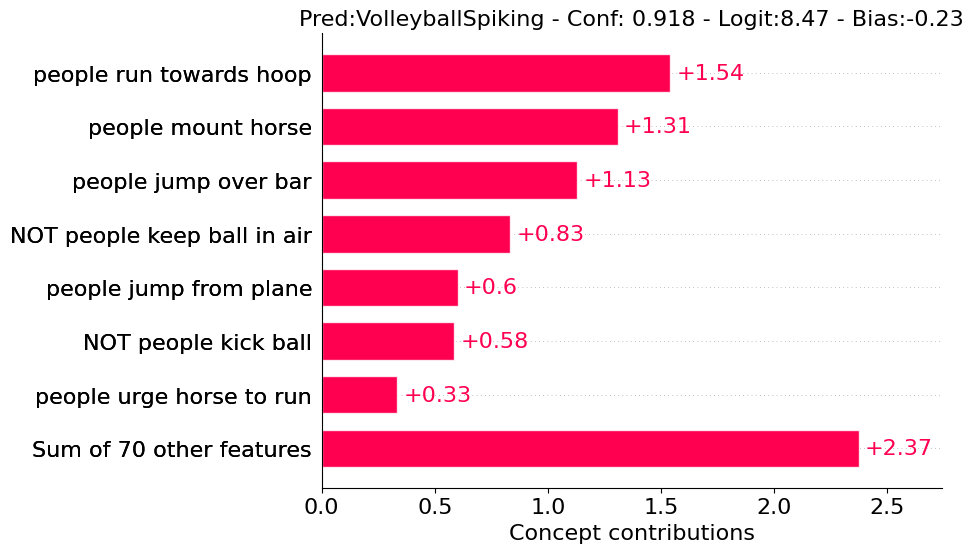

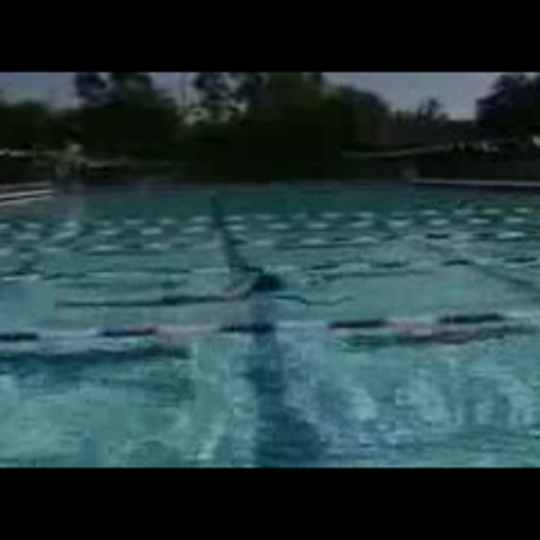

Image:1306 Gt:BreastStroke, 1st Pred:BreastStroke, 7.883, 2nd Pred:BalanceBeam, 4.930


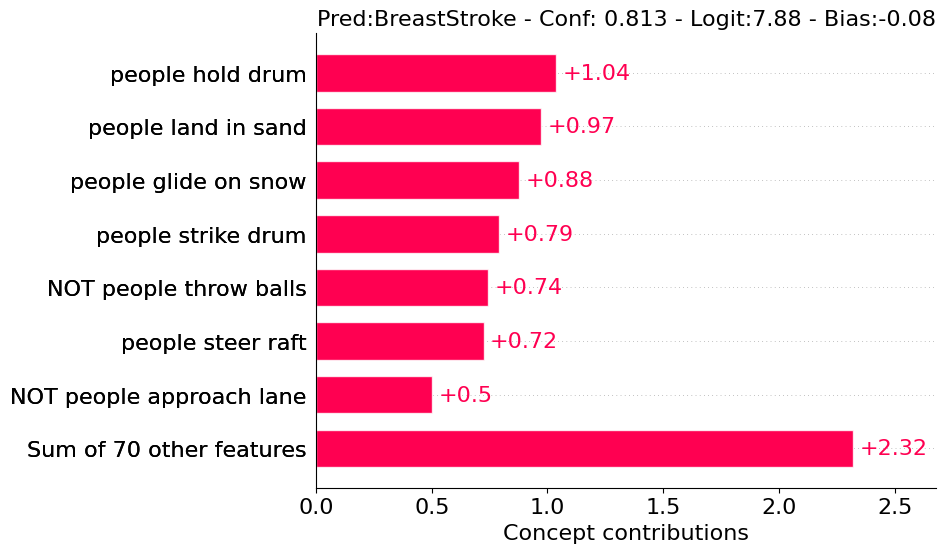

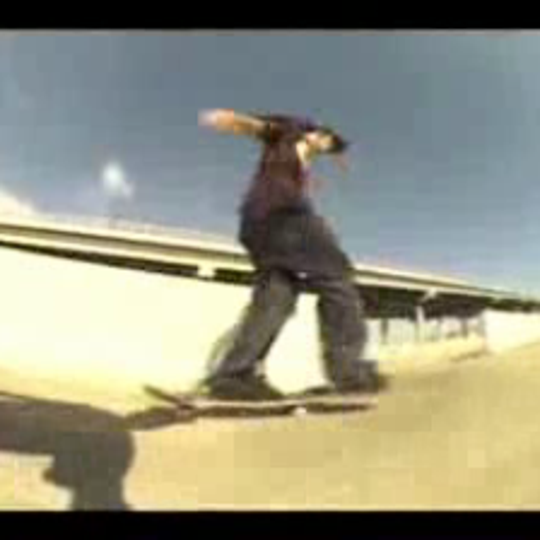

Image:1725 Gt:SkateBoarding, 1st Pred:SkateBoarding, 7.930, 2nd Pred:Punch, 5.056


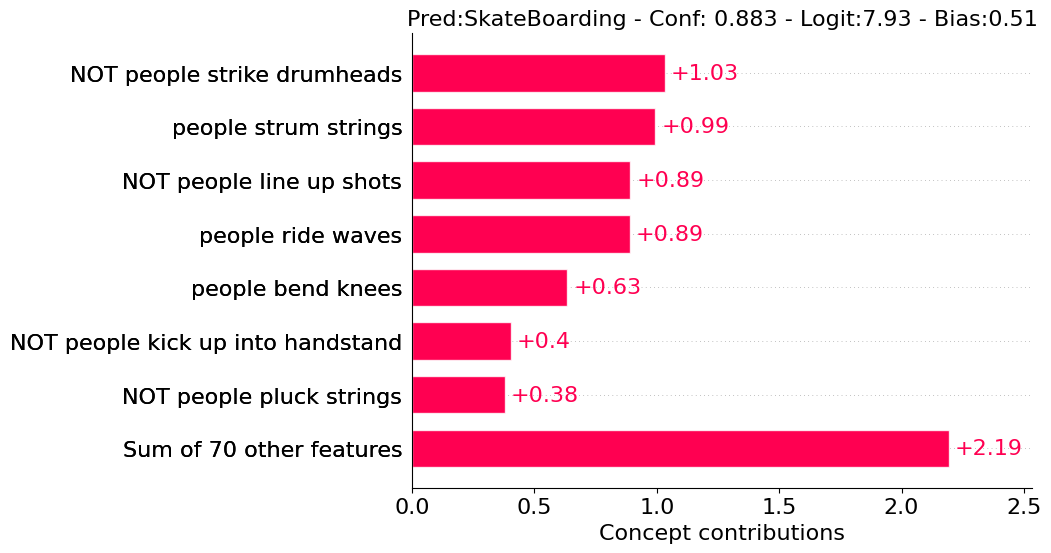

In [18]:
from torchvision.transforms import ToPILImage
from IPython.display import display, HTML
to_display = random.sample([i for i in range(len(val_pil_data))], k=4)
# to_display = [5,234,122,52,999]
to_pil_image = ToPILImage()

# val_pil_data.get_sample_path=True
with torch.no_grad():
    for i in to_display:
        image, label = val_pil_data[i]
        # video_path = avi_to_mp4(video_path)
        # video_html = f'''
        # <video width="640" height="480" controls>
        #   <source src="{video_path}" type="video/mp4">
        #   Your browser does not support the video tag.
        # </video>
        # '''
        x, _ = val_data_t[i]
        x = x.unsqueeze(0).to(device)
        # image = to_pil_image(image)
        # display(HTML(video_html))
        image = to_pil_image(image)
        display(image.resize([540,540]))
        outputs, concept_act = model(x)
        
        top_logit_vals, top_classes = torch.topk(outputs[0], dim=0, k=2)
        conf = torch.nn.functional.softmax(outputs[0], dim=0)
        print("Image:{} Gt:{}, 1st Pred:{}, {:.3f}, 2nd Pred:{}, {:.3f}".format(i, classes[int(label)], classes[top_classes[0]], top_logit_vals[0],
                                                                      classes[top_classes[1]], top_logit_vals[1]))
        
        for k in range(1):
            contributions = concept_act[0]*model.final.weight[top_classes[k], :]
            feature_names = [("NOT " if concept_act[0][i] < 0 else "") + concepts[i] for i in range(len(concepts))]
            values = contributions.cpu().numpy()
            max_display = min(int(sum(abs(values)>0.005))+1, 8)
            title = "Pred:{} - Conf: {:.3f} - Logit:{:.2f} - Bias:{:.2f}".format(classes[top_classes[k]],
                             conf[top_classes[k]], top_logit_vals[k], model.final.bias[top_classes[k]])
            plots.bar(values, feature_names, max_display=max_display, title=title, fontsize=16)

In [17]:
path

NameError: name 'path' is not defined

In [ ]:
image.shape

torch.Size([3, 16, 224, 298])

In [ ]:
type(val_pil_data[0][0])

torch.Tensor

In [ ]:
val_d_probe = 'cifar10'+"_val"
cls_file = data_utils.LABEL_FILES[dataset]

val_data_t = data_utils.get_data(val_d_probe, preprocess=target_preprocess,args=argument)
val_pil_data = data_utils.get_data(val_d_probe,args=argument)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch
from viclip import get_viclip, retrieve_text, _frame_from_video

# modify xxx to the path of the pretrained model
model_cfgs = {
    'viclip-l-internvid-10m-flt': {
        'size': 'l',
        'pretrained': 'xxx/ViCLIP-L_InternVid-FLT-10M.pth',
    },
    'viclip-l-internvid-200m': {
        'size': 'l',
        'pretrained': 'xxx/ViCLIP-L_InternVid-200M.pth',
    },
    'viclip-b-internvid-10m-flt': {
        'size': 'b',
        'pretrained': 'xxx/ViCLIP-B_InternVid-FLT-10M.pth',
    },
    'viclip-b-internvid-200m': {
        'size': 'b',
        'pretrained': '/data/datasets/video_checkpoint/ViCLIP-B_InternVid-200M.pth',
    },
}
ckpt='/data/datasets/video_checkpoint/ViCLIP-B_InternVid-200M.pth'
cfg = model_cfgs['viclip-b-internvid-200m']
model_l = get_viclip(cfg['size'], cfg['pretrained'])


<All keys matched successfully>


In [ ]:
model_l

{'viclip': ViCLIP(
   (vision_encoder): VisionTransformer(
     (conv1): Conv3d(3, 768, kernel_size=(1, 16, 16), stride=(1, 16, 16), bias=False)
     (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
     (transformer): Transformer(
       (resblocks): ModuleList(
         (0): ResidualAttentionBlock(
           (drop_path1): Identity()
           (drop_path2): Identity()
           (attn): MultiheadAttention(
             (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
           )
           (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
           (mlp): Sequential(
             (c_fc): Linear(in_features=768, out_features=3072, bias=True)
             (gelu): QuickGELU()
             (drop1): Dropout(p=0.0, inplace=False)
             (c_proj): Linear(in_features=3072, out_features=768, bias=True)
             (drop2): Dropout(p=0.0, inplace=False)
           )
           (ln_2): LayerNorm((768,), eps=1e-05, ele

In [ ]:
model_l['viclip'].tokenizer

In [ ]:
model_l['tokenizer']